In [ ]:
# pip install pandas jupyter pandarallel requests tqdm

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import re
import pandas as pd
import requests

from tqdm import tqdm
tqdm.pandas()

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=False)
!pip install pymorphy2
from pymorphy2 import MorphAnalyzer
from functools import lru_cache
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from multiprocessing import Pool
from tqdm import tqdm

import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
random.seed(42)

In [31]:
# column_names = ['address', 'name', 'rating', 'rubrics', 'text']
# df = pd.read_csv('geo-reviews-dataset-2023.tskv', sep='\t', names=column_names)
# df.head()

In [32]:
# #Инициализируем экземпляр MorphAnalyzer
# morph = pymorphy2.MorphAnalyzer(lang='ru')

# #Скачаем словарь стоп-слов, который потребуется в функции лемматизации текста
# nltk.download('stopwords')
# stops = nltk.corpus.stopwords.words('russian')

# # Можем также дополнить датасет дополнительными стоп-словами
# stops.extend(['address=', 'name_ru=', 'rating=', 'rubrics=', 'text=' 'что', 'это', 'так', 'вот', 'который', 'быть', 'как', 'в', 'к', 'на', 'руб', 'мой', 'твой', 'его', 'её', 'наш', 'ваш', 'их', 'свой', 'еще', 'очень', 'поэтому', 'однако', 'конечно'])
# unique_stops = set(stops)

# #Объявим функцию для лемматизации текста и выделения частей речи
# def extract_nouns(text):
#     nouns = []

#     #Очищаем текст от лишнего
#     clean_text = re.sub(r'\s+', ' ', re.sub(r'[\d\W]', ' ', text))

#     # Разбиваем текст на слова
#     words = clean_text.split()

#     for word in words:
#         parsed_word = morph.parse(word)[0]

#         # Приводим слово к нормальной форме
#         normalized_word = parsed_word.normal_form
#         if normalized_word not in unique_stops:

#             # Определяем часть речи слова
#             pos = parsed_word.tag.POS
#             case = parsed_word.tag.case
#             anim = parsed_word.tag.animacy

#             # Выделяем существительные, но отфильтровываем имена собственные
#             if pos == 'NOUN' and not (case == 'nomn' and anim == 'anim'):
#                 nouns.append(normalized_word)

#     return ' '.join(nouns)

# column_names = ['address', 'name', 'rating', 'rubrics', 'text']  
# df = pd.read_csv('geo-reviews-dataset-2023.tskv', sep='\t', names=column_names)
# df = df.dropna()  # Удаляем строки с пустыми значениями в столбце 'text'
# # Инициализируем tqdm для отслеживания прогресса
# tqdm.pandas()

# # Применяем extract_nouns к столбцу 'text' с отслеживанием прогресса
# df['aspects'] = df['text'].progress_apply(extract_nouns)
# df['address'] = df['address'].str.replace('address=', '')
# df['name'] = df['name'].str.replace('name_ru=', '')
# df['rating'] = df['rating'].str.replace('rating=', '')
# df['rubrics'] = df['rubrics'].str.replace('rubrics=', '')
# df['text'] = df['text'].str.replace('text=', '')
# df.to_csv('all_reviews.csv', index=False)


In [44]:
# #Объявим функцию для обработки текстов и сохранения результата анализа
# def find_top_words_by_rubric(vectorizer):

#     result = {
#         'rubrics': [],
#         'words': [],
#         'reviews': [],
#         'scores': []
#     }

#     #Проходимся по рубрикам
#     for rubric in df_flattened['rubrics'].unique():
#         texts = df_flattened[df_flattened['rubrics'] == rubric]['aspects']
#         total_count = texts.shape[0]

#         # В анализ возьмём только те рубрики, у которых есть несколько текстов
#         if total_count >= 5:
#             tfidf_matrix = vectorizer.fit_transform(texts)
#         else:
#             continue

#         result['rubrics'].append(rubric)
#         result['reviews'].append(total_count)
#         feature_names = vectorizer.get_feature_names_out()
#         tfidf_scores = tfidf_matrix.max(axis=0).toarray().ravel()

#         # Возьмём топ-20 слов для каждой рубрики
#         top_words_indices = tfidf_scores.argsort()[-20:][::-1]
#         top_words = [feature_names[i] for i in top_words_indices]
#         result['words'].append(', '.join(top_words))
#         top_scores = [str(tfidf_scores[i]) for i in top_words_indices]
#         result['scores'].append(', '.join(top_scores))

#     return result

# # Развернём датасет по рубрикам, так как одна организация может принадлежать к списку рубрик
# #df['rubrics'] = df['rubrics'].apply(lambda x: x.split(";"))
# df_flattened  = df.explode('rubrics')

# # Инициализируем TF-IDF-векторизатор
# aspects_vectorizer = TfidfVectorizer(use_idf = True, max_df = 0.8, min_df = 0.1)

# # Создадим датафрейм с результатами анализа
# tf_idf_aspects = pd.DataFrame(find_top_words_by_rubric(aspects_vectorizer)).sort_values(by='reviews', ascending=False)

In [2]:
df = pd.read_csv('all_reviews.csv')

In [3]:
df.head()

,address,name,rating,rubrics,text,aspects
0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3.0,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...,квартал лето ночь гонка стройка окно этаж райо...
1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5.0,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ...",сеть магазин ассортимент цена главное качество...
2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1.0,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я...",правило шкаф замочка отпечаток палец дичь подп...
3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4.0,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...,условие аренда персонал ботинок крепление сноу...
4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5.0,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...,топ топ смысл посещение бровь ресница итог раб...


Уберем знаки переноса строки из текста

In [8]:
def clean_text(row):
        return re.sub(r'\\|n', '', row)

df['text'] = df['text'].apply(lambda x: clean_text(x))
df.text.isnull().sum()

0

Обработаем адресса и выделим регионы:

In [11]:
# Оставим только название населенных пунктов
def extract_words_before_comma(text):
    match = re.match(r'^([^,]+)', text)
    return match.group(1).strip() if match else ""

df['address'] = df['address'].apply(extract_words_before_comma)

df.loc[df['address'] == '', 'address'] = 'Москва'
df.loc[(df['address'] == 'Ярославское шоссе') & (df['name'] == 'Охотник Рыболов'), 'address'] = 'Москва'
df.loc[(df['address'] == 'Россия') & (df['name'] == 'Сырберис'), 'address'] = 'Санкт-Петербург'
df.loc[(df['address'] == 'Россия') & (df['name'] == 'Алтан'), 'address'] = 'Алтайский край'
df.loc[df['address'] == 'Барнаул', 'address'] = 'Алтайский край'
df.loc[df['address'] == 'г. Ярославская область', 'address'] = 'Ярославская область'
df.drop(df[(df['address'] == 'Минск') | (df['address'] == 'Окситания')].index, inplace=True)

In [132]:
def swap_name(row):
    regions = {
        'Москва': [r'.*Моск.*','-', '\u200bММосква5 1705 километр','Russian Federation','Серпухов', 
                   'Республика Крымское шоссе', 'Киевское шоссе', 'национальный парк Лосиный остров', 
                   'паромная переправа № 1', 'шоссе Энтузиастов', 'Симферопольское шоссе','Р-119', 
                   'природно-исторический парк Кузьминки-Люблино','Угличское водохранилище','Новосходненское шоссе',
                   'Российская Федерация', 'Мещерский парк','Россиия','Росси','iМосквая','iРоссия'],
        'Санкт-Петербург': [r'.*Санкт-Петерб.*', 'Санкт-Петербург','St. Petersburg','.*Ленингр.*', 
                            'АМосква181 Скандинавия', 'Гладышев','г. Санкт-Петербург','АМосква121 Сортавала', 
                            '.*государственный.*', 'СанĸтМоскваПетербург','СанктМоскваПетербург','енинградская обл.'],
        'Магаданская область': [r'.*Мага.*', 'посёлок городского типа Сокол'],
        'Республика Саха(Якутия)': [r'.*\s*Якут\s*.*', 'Republic of Sakha \(Yakutia\)'],
        'Чеченская Республика': ['Chechen Republic', 'Грозный'],
        'Саратовская область': ['Р-228', '.*Сарат.*', 'РМосква228','Приволжская железная дорога'],
        'Краснодарский край': ['.*Краснод.*', 'Сочи', 'Адлер','Новороссийск', 'Красноармейский район', 'Белореченск ул. Ленина', 'iРоссия', 'Архипо-Осиповка', 'посёлок городского типа Сириус'],
        'Тюменская область': ['.*Тюмен.*'],
        'Тверская область': ['.*Твер.*'],
        'Смоленская область': ['.*Смолен.*'],
        'Архангельская область': ['.*Арханг.*'],
        'Карачаево-Черкесская Республика': ['.*Карач.*', 'Теберда', 'курортный посёлок Домбай'],
        'Липецкая область': ['.*Липец.*', 'Елец'],
        'Томская область': ['.*Томск.*'],
        'Нижегородская область': ['.*Ниж.*', '.*Nizhn.*'],
        'Самарская область': ['.*Самар.*', 'Рачейский бор'],
        'Хабаровский край': ['.*Хаба.*','Far Eastern Railway'],
        'Оренбургская область': ['.*Оренбург.*', '.*Орск.*'],
        'Тамбовская область': ['.*Тамбо.*', 'городской округ Тамбов'],
        'Ханты-Мансийский автономный округ': ['.*Хант.*', 'ХМАО'],
        'Рязанская область': ['.*Ряза.*'],
        'Тульская область': ['.*Тул.*'],
        'Новосибирская область': ['.*Новосиб.*', 'РМосква254 Иртыш','Р-254 Иртыш', 'село Новолуговое'],
        'Вологодская область': ['.*Волог.*'],
        'Калужская область': ['.*Калу.*'],
        'Сочи': ['.*Росси.*'],
        'Ростовская область': ['.*Росто.*', 'Европейский маршрут E50'],
        'Амурская область': ['.*Амурск.*', 'Благовещенск'],
        'Кировская область': ['.*Киров.*'],
        'Северная Осетия': ['.*Осет.*', 'РМосква217 Кавказ','Северная Осетия Кавказ', 'Р-217', 'Владикавказ'],
        'Ярославская область': ['.*Яросла.*', 'Горьковское водохранилище', 'паромная переправа Мышкин – Коровино', 
                                'г\. Ярославская область', 'Переславль-Залесский'],
        'Волгоградская область': ['.*Волго.*','Азиатский маршрут АН4'],
        'Пензенская область': ['.*Пенз.*'],
        'Республика Татарстан': ['.*Тата.*', 'Казань', '425200','.*Куйбыш.*'],
        'Орловская область': ['.*Орл.*', '.*Ор[её].*'],
        'Пермский край': ['.*Перм.*'],
        'Иркутская область': ['.*Ирку.*', 'РМосква255 Сибирь','Р-255 Сибирь', 'Р-258 Байкал','РМосква258 Байкал'],
        'Псковская область': ['.*Пск.*'],
        'Воронежская область': ['.*Ворон.*', 'река Усмань', 'Борисоглебск','Воробьёвский район'],
        'Омская область': ['.*Омск.*'],
        'Красноярский край': ['.*Красно[ят].*'],
        'Владимирская область': ['.*Владим.*'],
        'Брянская область': ['.*Брянс.*'],
        'Костромская область': ['.*Костр.*'],
        'Новгородская область': ['.*Новгор.*', 'Старая Русса'],
        'Свердловская область': ['.*Свердл.*','60.793733', 'Екатеринбург', 'Асбест'],
        'Курганская область': ['.*Кург.*'],
        'Челябинская область': ['.*Челяб.*', 'Миасс и Златоуст'],
        'Ивановская область': ['.*Ивано.*'],
        'Калининградская область': ['.*Калинин.*'],
        'Белгородская область': ['.*Белго.*', 'М-2'],
        'Удмуртская Республика': ['Ижевск'],
        'Республика Хакасия': ['.*Хак.*', 'Абакан'],
        'Республика Алтай': ['Алтайский район', 'село Алтайское', 'Р-256 Чуйский тракт'],
        'Кемеровская область': ['.*Кеме.*'],
        'Ямало-Ненецкий автономный округ': ['горный массив Рай-Из', 'Ямальский район'],
        'Кабардино-Балкарская Республика': ['Нальчик','КабардиноМоскваБалкарская Республика'],
        'Ульяновская область': ['.*Ульян.*'],
        'Мурманская область': ['.*Мурм.*', 'Октябрьская железная дорога'],
        'Республика Крым': ['Республіка Крим', 'Симферополь', 'Севастополь', 'Феодосия', 'Нахимовский муниципальный округ'],
        'Астраханская область': ['Астрахань'],
        'Курская область': ['.*Курск.*'],
        'Республика Адыгея': ['.*Майкоп.*'],
        'Республика Карелия': ['Онежское озеро', 'Питкяранта','РМосква119','Петрозаводск'],
        'Республика Мордовия': ['Саранск'],
        'Ставропольский край': ['.*Став.*', 'городской округ Ставрополь'],
        'Республика Коми': ['Сыктывкар'],
        'Республика Бурятия': ['Улан-Удэ','Улан-Удэ'],
        'Республика Башкортостан': ['Уфа'],
        'Чувашская Республика': ['.*Чебоксары.*'],
        'Забайкальский край': ['посёлок городского типа Забайкальск'],
    }

    for region, patterns in regions.items():
        for pattern in patterns:
            row = re.sub(pattern, region, row, flags=re.IGNORECASE)

    return row


In [133]:
filtered_df['region'] = filtered_df['address'].progress_apply(swap_name)

100%|██████████| 118216/118216 [00:41<00:00, 2868.20it/s]


Очистим текст 

In [28]:
m = MorphAnalyzer()
regex = re.compile("[А-Яа-яA-z]+")

def words_only(text, regex=regex):
    try:
        return regex.findall(text.lower())
    except:
        return []

@lru_cache(maxsize=128)
def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]


mystopwords = stopwords.words('russian') 
def remove_stopwords(lemmas, stopwords = mystopwords):
    return [w for w in lemmas if not w in stopwords and len(w) > 3]

def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)
    return ' '.join(remove_stopwords(lemmas))


df['cleaned_text'] = df['text'].apply(clean_text)

In [29]:
df.head()

,address,name,rating,rubrics,text,aspects,region,cleaned_text
0,Екатеринбург,Московский квартал,3.0,Жилой комплекс,Московский квартал 2.Шумно : летом по ночам ди...,квартал лето ночь гонка стройка окно этаж райо...,Свердловская область,московский квартал шумно лето ночь дикий гонка...
1,Московская область,Продукты Ермолино,5.0,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ...",сеть магазин ассортимент цена главное качество...,Москва,замечательный сеть магазин общий хороший ассор...
2,Краснодар,LimeFit,1.0,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я...",правило шкаф замочка отпечаток палец дичь подп...,Краснодарский край,знать смутить дать правило удивить хотеть твой...
3,Санкт-Петербург,Snow-Express,4.0,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. Дружелюбный персонал.Н...,условие аренда персонал ботинок крепление сноу...,СанктМоскваПетербург,хороший условие аренда дружелюбный персонал бы...
4,Тверь,Студия Beauty Brow,5.0,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...,топ топ смысл посещение бровь ресница итог раб...,Тверская область,мастер ангелина весь смысл немного волноваться...


In [33]:
df.rating.unique()

array([3., 5., 1., 4., 2., 0.])

Уравняем классы и уменьшим избыточность положительных оценок, сведя все к трем категориям: негативные, нейтральные и позитивные.

In [45]:
filtered_df_5 = df[df['rating'] == 5].sample(n=50000, random_state=42)
filtered_df_others = df[df['rating'] != 5]
filtered_df = pd.concat([filtered_df_5, filtered_df_others])


(array([  200.,     0., 34296.,     0., 12071.,     0., 21652.,     0.,
        41116., 50000.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

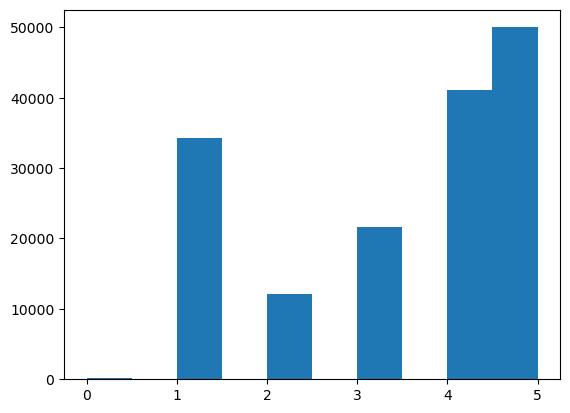

In [46]:
plt.hist(final_df.rating)

In [58]:
filtered_df['target'] = filtered_df['rating'].astype(int)
def grades_cat(row):
    if row['target'] == 1 or row['target'] == 0 or row['target'] == 2:
        return 0
    elif row['target'] == 3:
        return 1
    else:
        return 2
filtered_df['target'] = filtered_df.apply(grades_cat, axis = 1)

In [60]:
filtered_df_2 = filtered_df[filtered_df['target'] == 2].sample(n=50000, random_state=42)
filtered_others = filtered_df[filtered_df['target'] != 2]
filtered_df = pd.concat([filtered_df_2, filtered_others])

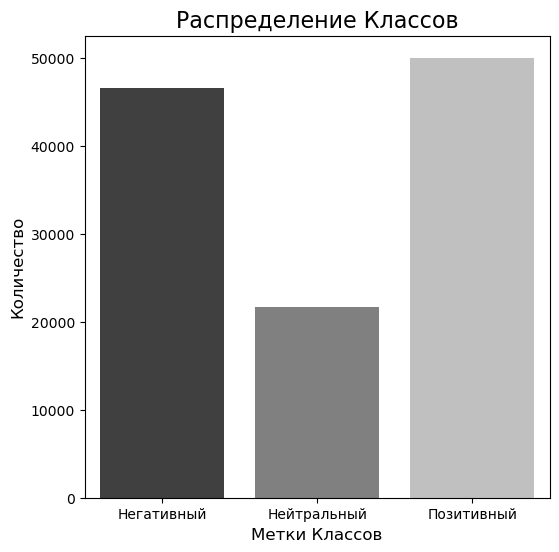

In [62]:
filtered_df['target'] = filtered_df['target'].map({0: 'Негативный', 1: 'Нейтральный', 2: 'Позитивный'})
df = filtered_df.sort_values(by='target')
plt.figure(figsize=(6, 6))
sns.countplot(x='target', data=df, palette='gray')
plt.xlabel('Метки Классов', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.title('Распределение Классов', fontsize=16)
plt.show()


Расширим признаковое пространство для улучшения ML методов.

In [64]:
filtered_df['sym_len'] = filtered_df.cleaned_text.apply(len)
filtered_df['word_len'] = filtered_df.cleaned_text.apply(lambda x: len(x.split()))

In [66]:
filtered_df.head()

,address,name,rating,rubrics,text,aspects,region,cleaned_text,target,sym_len,word_len
470956,Московская область,Мон Плезир,5.0,Гостиница,"Очень хорошая, уютная гостиницаРемонт тут дост...",гостиница nремонт номер количество свет персон...,Москва,очень хороший уютный гостиницаремонт достаточн...,Позитивный,421,48
9799,Московская область,У Гаго,4.0,Быстрое питание,"Заказывали шашлык на работу, всё вкусно и цены...",шашлык работа цена заказ шашлык,Москва,заказывать шашлык работа вкусно цена приемлемы...,Позитивный,133,17
491629,Москва,Чистая Планета,5.0,Магазин хозтоваров и бытовой химии;Средства ги...,Попробовала протестить пятновыводитель: теперь...,пятновыводитель nкондиционер бельё вид искусство,Москва,попробовать протестить пятновыводитель бояться...,Позитивный,121,12
101415,Санкт-Петербург,Городская больница Святого Праведного Иоанна К...,5.0,Родильный дом,Рожала тут первую доченьку в 2017 году. Персон...,доченька год персонал роддом стимуляция отделе...,СанктМоскваПетербург,рожать первый доченька персонал очень вежливый...,Позитивный,236,28
259109,Белгородская область,Линия,5.0,Продуктовый гипермаркет;Универмаг,"Ассортимент большой,выбор есть и дешевого сегм...",ассортимент выбор сегмент парковка выпечка коф...,Белгородская область,ассортимент большой выбор дешёвый сегмент доро...,Позитивный,240,31


In [67]:
#ищем существительные
def count_nouns(sentence):
    words = word_tokenize(sentence, language='russian')
    morph = MorphAnalyzer()
    nouns_count = sum(1 for word in words if 'NOUN' in morph.parse(word)[0].tag)
    return nouns_count
filtered_df['nouns_count'] = filtered_df['cleaned_text'].apply(count_nouns)

In [4]:
def count_adverbs(sentence):
    from nltk.tokenize import word_tokenize
    from pymorphy2 import MorphAnalyzer
    words = word_tokenize(sentence, language='russian')
    morph = MorphAnalyzer()
    adverbs_count = sum(1 for word in words if 'ADVB' in morph.parse(word)[0].tag)
    return adverbs_count
filtered_df['adverbs_count'] = filtered_df['cleaned_text'].parallel_apply(count_adverbs)

In [9]:
def count_adjectives(sentence):
    from nltk.tokenize import word_tokenize
    from pymorphy2 import MorphAnalyzer
    words = word_tokenize(sentence, language='russian')
    morph = MorphAnalyzer()
    adjectives_count = sum(1 for word in words if 'ADJF' in morph.parse(word)[0].tag)
    return adjectives_count
filtered_df['adjectives_count'] = filtered_df['cleaned_text'].parallel_apply(count_adjectives)

In [17]:
filtered_df['specific_punctuation_count'] = filtered_df['text'].parallel_apply(
    lambda x: sum(1 for char in x if char in ':!@)(*?<3:-'))

In [22]:
filtered_df['uppercase_letters_count'] = filtered_df['text'].parallel_apply(
    lambda x: sum(1 for char in x if char.isupper()))


In [31]:
all_words = [word for words_list in filtered_df['cleaned_text'].str.split() for word in words_list]
word_counts = Counter(all_words)
sorted_word_counts = word_counts.most_common()

In [37]:
# Определим порог для редко и часто встречаемых слов 
threshold_rare = 8
threshold_frequent = 5603

# Функция для определения редких и частых слов в строке
def categorize_words(words):
    rare_words = len([word for word in words if word_counts[word] <= threshold_rare])
    frequent_words = len([word for word in words if word_counts[word] >= threshold_frequent])
    return rare_words, frequent_words

# Применим функцию к столбцу 'text' и создадим новые столбцы
filtered_df['rare_words'], filtered_df['frequent_words'] = zip(*filtered_df['cleaned_text'].str.split().apply(categorize_words))

In [2]:
df = pd.read_csv('preprocessingf.csv')

In [37]:
top_words_by_class = {}

for target_class in df['target'].unique():
    class_df = df[df['target'] == target_class]
    class_text = ' '.join(class_df['cleaned_text'])
    words = class_text.split()
    word_counts = Counter(words)
    top_words = word_counts.most_common(80)
    top_words_by_class[target_class] = top_words
    top_words_only = [word for word, _ in top_words]    
    top_words_by_class[target_class] = top_words_only

Первые наиболее частые слова будут специфичны для всех классов, уберем их

In [38]:
positive = top_words_by_class['Позитивный'][50:]

In [39]:
neutral = top_words_by_class['Нейтральный'][50:]

In [40]:
negative = top_words_by_class['Негативный'][50:]

первые 15 слов специфичны для всех классов возмем оставшиеся 15

In [41]:
df['pos_f'] = df['cleaned_text'].apply(lambda x: 1 if any(word in x for word in positive) else 0)
df['negat_f'] = df['cleaned_text'].apply(lambda x: 1 if any(word in x for word in negative) else 0)
df['neut_f'] = df['cleaned_text'].apply(lambda x: 1 if any(word in x for word in neutral) else 0)

In [44]:
df.to_csv('preprocessingf.csv', index=False)